# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Carstenz Meru Phantara
- **Email:** carstenzmp@gmail.com
- **ID Dicoding:** carstenz

## Menentukan Pertanyaan Bisnis

- Pada kurun waktu kapan sepeda dipakai paling banyak 
- bagaimana pengaruh musim terhadap pemakaian sepeda

## Import Semua Packages/Library yang Digunakan

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [51]:
#membaca file csv "day.csv"
day_df = pd.read_csv("data/day.csv", delimiter=",")

#membaca file csv "hour.csv"
hour_df = pd.read_csv("data/hour.csv", delimiter=",")

#melihat isi file hour.csv
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- File csv berisi data tentang kondisi serta jumlah sepeda yang dipakai dalam suatu waktu tertentu
- Perbedaan mendasar antara day.csv dan hour.csv adalah data ditulis per hari dalam day.csv dan data ditulis per jam pada hour.csv yang dibuktikan dengan adanya column "hr" yang tidak terdapat di dalam day.scv
- Setiap kolom meliliki maksud tersendiri, diantaranya :
    - instant: index baris
    - dteday : tanggal
    - season : musim 
        - 1 : spring(musim semi)
        - 2 : summer(musim panas)
        - 3 : fall(musim gugur)
        - 4 : winter(musim dingin)
    - yr : tahun (0: 2011, 1:2012)
    - mnth : bulan ( 1 to 12)
    - hr : jam (0 to 23)
    - holiday : apakah hari itu adalah hari libur
    - weekday : hari dalam seminggu
    - workingday : hari kerja (1 jika hari kerja, 0 jika weekend atau hari libur)
    - weathersit :
        - 1 : cerah, sedikit mendung
        - 2 : berkabut, mendung
        - 3 : sedikit salju, hujan ringan
        - 4 : bersalju, hujan lebat, badai
    - temp : Normalisasi temperatur yang tercatat
    - atemp: Normalisasi temperatur yang dirasakan
    - hum: Normalisasi kelembapan udara
    - windspeed: Normalisasi kecepatan udara
    - casual: Pengguna sementara
    - registered: Pengguna Terdaftar
    - cnt: Total pengguna

### Assessing Data  
Pengecekan data untuk melihat apakah data ada yang bermasalah

#### Cek tipe data dalam hour.csv dan day.csv

In [52]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [53]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Bisa dilihat berdasarkan kedua hasil diatas, kolom dteday yang merupakan date atau tanggal memiliki tipe berupa objek.  
Hal ini dapat membuat masalah jika kita ingin memakai data tersebut untuk melakukan suatu proses, misalnya untuk mengambil tanggal berapa sepeda dipinjam.
Untuk memperbaiki hal ini akan di lanjutkan di tahap cleaning

#### Cek isi data menggunakan .describe()

In [54]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [55]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Hal menarik yang dapat kita lihat dari kedua hasil tersebut, ada perbedaan pada max weathersit pada day_df dan hour_df.   
Value terbesar dari wheathersit day_df adalah 3 yang berarti sedikit salju atau hujan ringan, Sementara value terbesar dari weathersit hour_df adalah 4 yang berarti bersalju atau hujan lebat.  
Dalam konteks ini berarti ada suatu situasi dimana hanya terjadi hujan lebat untuk sesaat yang menyebabkan perbedaan value tersebut.  
Hal ini dapat membuktikan jika hour_df memiliki data yang lebih bervariatif dan lebih cocok untuk dijadikan acuan kedepannya.

#### Cek data yang hilang (missing data)

In [56]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [57]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat dilihat bahwa tidak ada data yang kosong di antara 2 hasil tersebut

#### Cek data duplikat

In [58]:
day_df.duplicated().sum()

0

In [59]:
hour_df.duplicated().sum()

0

Dapat dilihat tidak ada data yang terduplikat

#### Cek data outlier

In [60]:
#mengambil data numerical
numeric_columns = day_df.select_dtypes(include=['int64', 'float64']).columns

#mendeklarasi batas atas dan batas bawah (Q1 dan Q3) serta IQR
Q1 = day_df[numeric_columns].quantile(0.25)
Q3 = day_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

#mengembalikan value true jika data adalah outlier dan false jika bukan outlier
outliers = (day_df[numeric_columns] < (Q1 - 1.5 * IQR)) | (day_df[numeric_columns] > (Q3 + 1.5 * IQR))

#menjumlahkan semua true untuk mendapatkan jumlah outlier 
outliers.sum()

instant        0
season         0
yr             0
mnth           0
holiday       21
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
casual        44
registered     0
cnt            0
dtype: int64

In [61]:
#mengambil data numerical
numeric_columns = hour_df.select_dtypes(include=['int64', 'float64']).columns

#mendeklarasi batas atas dan batas bawah (Q1 dan Q3) serta IQR
Q1 = hour_df[numeric_columns].quantile(0.25)
Q3 = hour_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

#mengembalikan value true jika data adalah outlier dan false jika bukan outlier
outliers = (hour_df[numeric_columns] < (Q1 - 1.5 * IQR)) | (hour_df[numeric_columns] > (Q3 + 1.5 * IQR))

#menjumlahkan semua true untuk mendapatkan jumlah outlier 
outliers.sum()

instant          0
season           0
yr               0
mnth             0
hr               0
holiday        500
weekday          0
workingday       0
weathersit       3
temp             0
atemp            0
hum             22
windspeed      342
casual        1192
registered     680
cnt            505
dtype: int64

Bisa dilihat dari kedua hasil diatas bahwa ada beberapa data yang merupakan outlier, tetapi ada beberapa kolom outlier yang saya rasa kurang tepat seperti holiday, dimana hanya terdapat 2 value yaitu 0 jika bukan hari libur dan 1 jika hari libur, dan weathersit yang bernilai antara 1-4 tergantung cuaca.  
Jika outlier dari kolom ini diganti (misal holiday = 1 diganti menjadi holiday = 0), maka proses yang bersangkutan dengan holiday akan berbeda dengan hasil semestinya.

**Insight:**
- Dtype pada kolom dteday adalah object, yang mana seharusnya adalah datetime
- Data yang terdapat pada hour_df lebih banyak dan bervariatif dibandingkan dengan day_df
- Tidak ada data yang kosong atau hilang pada day_df maupun hour_df
- tidak ada data yang duplikat pada day_df dan hour_df
- terdapat beberapa outlier pada kolom holiday, windspeed, dan casual pada day_df
- terdapat beberapa outlier pada kolom holiday, weathersit, hum, windspeed, casual, registered, dan cnt pada hour_df
- data yang digunakan selatnjutnya adalah data dari hour_df karena sudah merepresentasikan data day_df

### Cleaning Data

Data yang dipakai adalah data dari hour_df karena sudah merepresentasikan data day_df

#### Mengubah dtype kolom dteday

pengubahan tipe data kolom dteday dari object menjadi datetime dibantu oleh library pandas menggunakan .to_datetime

In [62]:
#mengubah tipe data object menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

#menampilkan info hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Setelah tipe data diubah menjadi datetime, kita dapat mengakses tanggal yang diinginkan dengan lebih mudah

In [63]:
hour_df['dteday'].dt.day

0         1
1         1
2         1
3         1
4         1
         ..
17374    31
17375    31
17376    31
17377    31
17378    31
Name: dteday, Length: 17379, dtype: int32

### Mengatasi outlier  

untuk mengatasi outlier, kita harus tahu data apakah outlier tersebut.  
Data outlier biasanya memiliki nilai ekstrem yang berbeda dengan data lainnya.  
Jika data ekstrem tersebut ada karena suatu alasan yang valid, maka tidak perlu untuk dirubah karena akan mempengaruhi hasil.  
Tetapi jika data tersebut tidak didukung dengan alasan yang valid, maka data akan dirubah atau dihapus. 

#### Outlier pada holiday
Pada kolom holiday, hanya terdapat 2 value yaitu 1 dan 0. 1 Jika hari tersebut adalah hari libur dan 0 jika hari tersebut bukan hari libur.

In [64]:
weathersit_counts = hour_df['holiday'].value_counts().sort_index()
print(weathersit_counts)

holiday
0    16879
1      500
Name: count, dtype: int64


Pada kasus ini, outlier holiday yang berjumlah 500 merupakan value 1 yang jumlahnya jauh lebih sedikit dibandingkan 0.  
Karena value 1 pada holiday ini merupakan suatu data yang penting, maka tidak akan dirubah

#### Outlier pada weathersit

Sama seperti holiday, weathersit memiliki value yang pasti yaitu 1-4 dimana masing-masing value merepresentasikan suatu cuaca.
Untuk melihat lebih lanjut data apa outlier weathersit, kita dapat menampilkan jumlah data untuk setiap cuaca sebagai berikut :

In [65]:
weathersit_counts = hour_df['weathersit'].value_counts().sort_index()
print(weathersit_counts)

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64


Dapat dilihat dari hasil kode tersebut, outlier weathersit yang berjumlah 3 adalah data cuaca bernilai 4 yang merepresentasikan hujan badai atau salju tebal.  
Data ini tidak akan kita rubah karena dapat mempengaruhi hasil akhir nanti

#### Outlier pada kolom hum (humidity)

Untuk mengetahui data apa yang ada pada outlier, kita perlu melihat data apa saja yang ada pada humidity

In [66]:
weathersit_counts = hour_df['hum'].value_counts().sort_index()
print(weathersit_counts)

hum
0.00     22
0.08      1
0.10      1
0.12      1
0.13      1
       ... 
0.93    331
0.94    560
0.96      3
0.97      1
1.00    270
Name: count, Length: 89, dtype: int64


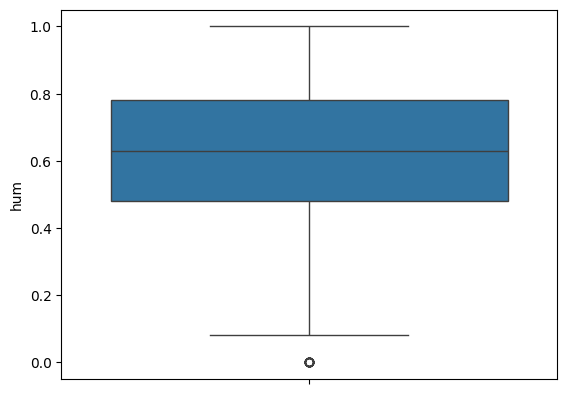

In [67]:
sns.boxplot(hour_df['hum'])
plt.show()

Bisa dilihat dari 2 bukti tersebut, bahwa outlier humidity yang berjumlah 22 adalah data yang bernilai 0.  
data ini merepresentasikan kelembapan udara yang bernilai 0%, yang mana tidak mungkin terjadi.  
Karena nilai 0 ini tidak valid, maka kita akan merubahnya.  

Sebelum melakukan sesuatu pada outlier, baik itu merubah data atau menghapus baris, kita harus tau data yang terkait dengan outlier tersebut.

In [68]:
hour_df[hour_df['hum'] == 0].reset_index()


,index,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1,1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
2,1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
3,1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
4,1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
5,1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
6,1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
7,1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
8,1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
9,1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


Bisa dilihat dari tabel tersebut, bahwa semua baris yang memiliki humidity 0 ada adalam 1 hari.  
Jika kita memilih untuk menghapus semua baris yang memiliki nilai humidity 0, maka kita akan kehilangan data pada hari tersebut.  
Maka dari itu kita akan menerapkan metode imputation untuk mengisi data humidity yang tidak valid.

Data yang akan menggantikan outlier adalah data median.  
Median dipilih karena data median tidak terpengaruh dengan outlier, membuat median menjadi opsi yang cukup baik terutama jika bentuk data tidak simetris atau skewed

In [69]:
#memastikan hum bertipe float
hour_df['hum'] = hour_df['hum'].astype(float)

#mengganti value 0 dengan median
hour_df.loc[hour_df['hum'] == 0, 'hum'] = hour_df['hum'].median()

#menampilkan hasil imputation
hour_df['hum'].describe()

count    17379.000000
mean         0.628026
std          0.191633
min          0.080000
25%          0.480000
50%          0.630000
75%          0.780000
max          1.000000
Name: hum, dtype: float64

Bisa dilihat hasil akhir dari imputation nilai nimimal dari humidity adalah 0.08  
Untuk mengecek lebih lanjut apakah masih ada outlier pada humidity, kita dapat mencari outlier pada data baru ini


In [70]:
#mendeklarasi batas atas dan batas bawah (Q1 dan Q3) serta IQR
Q1 = hour_df['hum'].quantile(0.25)
Q3 = hour_df['hum'].quantile(0.75)
IQR = Q3 - Q1

#mengembalikan value true jika data adalah outlier dan false jika bukan outlier
outliers = (hour_df['hum'] < (Q1 - 1.5 * IQR)) | (hour_df['hum'] > (Q3 + 1.5 * IQR))

#menjumlahkan semua true untuk mendapatkan jumlah outlier 
outliers.sum()


0

Dapat dilihat dari hasil tersebut, bahwa data humidity yang baru sudah tidak ada outlier.  

#### Outlier pada windspeed

Untuk mengetahui data apa yang ada pada outlier, kita perlu melihat data apa saja yang ada pada humidity

In [71]:
weathersit = hour_df['windspeed'].value_counts().sort_index()
print(weathersit)

windspeed
0.0000    2180
0.0896    1425
0.1045    1617
0.1343    1738
0.1642    1695
0.1940    1657
0.2239    1513
0.2537    1295
0.2836    1048
0.2985     808
0.3284     602
0.3582     460
0.3881     381
0.4179     296
0.4478     176
0.4627     146
0.4925     112
0.5224      84
0.5522      39
0.5821      44
0.6119      23
0.6418      14
0.6567      11
0.6866       5
0.7164       2
0.7463       2
0.7761       1
0.8060       2
0.8358       1
0.8507       2
Name: count, dtype: int64


Tidak ada satu value yang berjumlah 342 (outlier pada windspeed).  
Maka outlier dari windspeed bukanlah error yang terletak pada 1 value seperti humidity.  

Untuk mengetahui lebih lanjut, kita dapat melakukan visualisasi sebagai berikut :

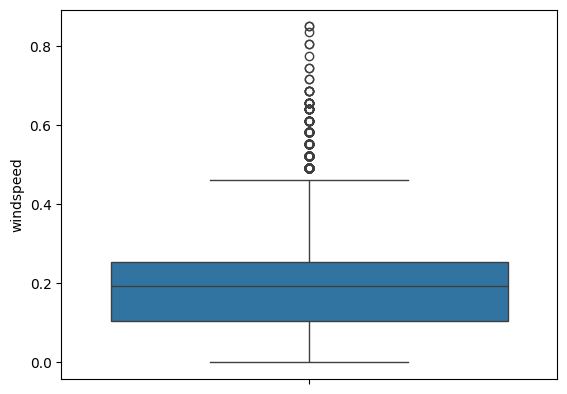

In [72]:
sns.boxplot(hour_df['windspeed'])
plt.show()

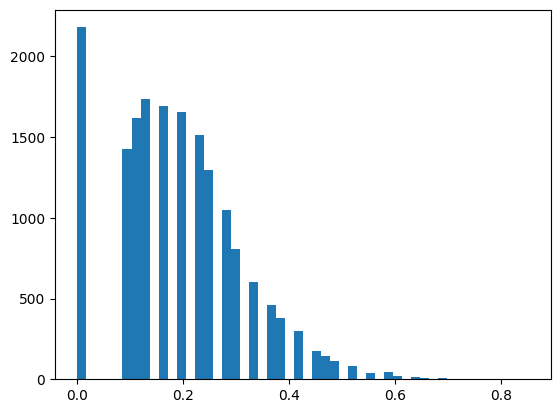

In [73]:
plt.hist(x=hour_df['windspeed'], bins=50)
plt.show()

In [74]:
#mencari batas atas windspeed
Q1 = hour_df['windspeed'].quantile(0.25)
Q3 = hour_df['windspeed'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

#menampilkan suma data yang lebih dari data atas
hour_df['windspeed'][hour_df['windspeed'] > upper_bound].value_counts().sort_index(ascending=False)

windspeed
0.8507      2
0.8358      1
0.8060      2
0.7761      1
0.7463      2
0.7164      2
0.6866      5
0.6567     11
0.6418     14
0.6119     23
0.5821     44
0.5522     39
0.5224     84
0.4925    112
Name: count, dtype: int64

Bisa dilihat dari data-data tersebut, outlier windspeed ada pada batas atas dimulai dari 0.4925 dan keatas.  
Data outlier windspeed terlihat sebagai data yang valid dikarenakan tingkat kemunculan angka lebih besar semakin sedikit (right skewed).   
Jika kita artikan dalam kehidupan nyata, maka angin yang sangat kencang pernah datang satu atau dua kali.

Untuk lebih jauh mengerti tentang data windspeed, kita bisa melakukan korelasi dengan kolom lain.

In [75]:
hour_df.corr()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.999995,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.003729,-0.074505,0.158295,0.282046,0.278379
dteday,0.999995,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.004357,-0.074645,0.157821,0.281450,0.277753
season,0.404046,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.145998,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.088295,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.161242,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.277959,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.011376,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.035342,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.018631,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.430619,0.026226,-0.152628,-0.120966,-0.142426


Dari tabel correlation tersebut, windspeed tidak ada korelasi kuat dengan tabel lain.  
Tabel yang berkorelasi paling kuat dengan windspeed adalah humidity dengan value -0.289626 dan season dengan value 0.149773.  
Dari data tersebut, belum cukup untuk mensupport korelasi windspeed dengan kolom lain. 

Meskipun begitu, dalam kasus ini saya akan membiarkan value dari windspeed dengan beberapa alasan :
- data outlier terdistribusi merata secara right skewed sehingga kemungkinan data adalah galat sangat kecil
- menghapus atau mengganti data berarti hasil proses tidak akan merepresentasikan data asli

#### Outlier pada casual

Untuk mengetahui data apa yang ada pada outlier, kita perlu melihat data apa saja yang ada pada casual

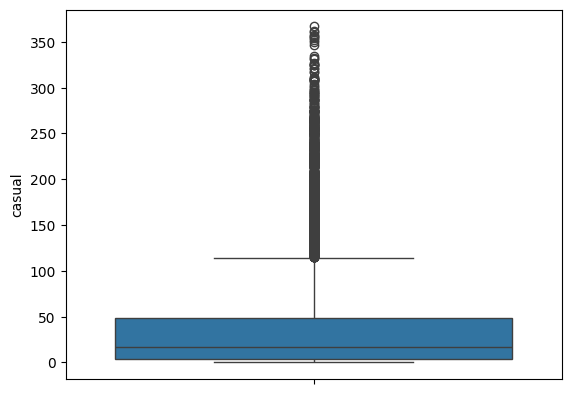

In [76]:
sns.boxplot(hour_df['casual'])
plt.show()

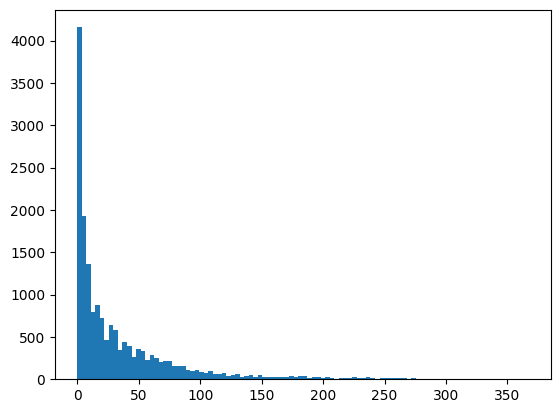

In [77]:
plt.hist(x=hour_df['casual'], bins=100)
plt.show()

In [78]:
#deklarasi Q1, Q3, dan IQR
Q1 = hour_df['casual'].quantile(0.25)
Q3 = hour_df['casual'].quantile(0.75)
IQR = Q3 - Q1

#mencari batas atas dan batas bawah
upper_bound = Q3 + 1.5 * IQR

#menampilkan semua data yang lebih dari batas atas
display(hour_df['casual'][hour_df['casual'] > upper_bound].value_counts().sort_index(ascending=False))
display(hour_df['casual'][hour_df['casual'] > upper_bound].value_counts().sort_values(ascending=False))

casual
367     1
362     1
361     1
357     1
356     1
       ..
119    15
118    13
117    19
116    13
115    15
Name: count, Length: 207, dtype: int64

casual
120    26
117    19
125    18
128    18
122    17
       ..
350     1
335     1
210     1
301     1
304     1
Name: count, Length: 207, dtype: int64

Dapat dilihat dari data diatas bahwa outlier pada casual terdapat pada nilai 115 keatas.  
Data outlier tersebar di 207 value dengan jumlah maksimal 26.  
Data outlier casual terlihat valid dengan bentuk right skewed. 

Dalam kasus ini saya akan membiarkan value dari casual dengan beberapa alasan :
- data outlier terdistribusi merata secara right skewed sehingga kemungkinan data adalah galat sangat kecil
- menghapus atau mengganti data berarti hasil proses tidak akan merepresentasikan data asli
- data dari casual terhubung dengan registered untuk membentuk cnt, jadi mengubah 1 kolom berarti juga harus mengubah kolom lain, yang mana dapat menimbulkan masalah

#### Outlier pada registered

Untuk mengetahui data apa yang ada pada outlier, kita perlu melihat data apa saja yang ada pada registered

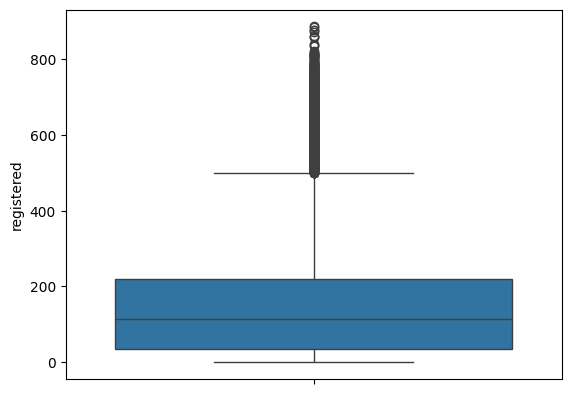

In [79]:
sns.boxplot(hour_df['registered'])
plt.show()

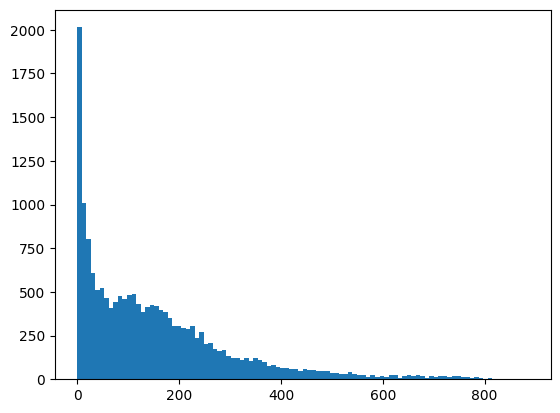

In [80]:
plt.hist(x=hour_df['registered'], bins=100)
plt.show()

In [81]:
#deklarasi Q1, Q3, dan IQR
Q1 = hour_df['registered'].quantile(0.25)
Q3 = hour_df['registered'].quantile(0.75)
IQR = Q3 - Q1

#mencari batas atas dan batas bawah
upper_bound = Q3 + 1.5 * IQR

#menampilkan semua data yang lebih dari batas atas
display(hour_df['registered'][hour_df['registered'] > upper_bound].value_counts().sort_index(ascending=False))
display(hour_df['registered'][hour_df['registered'] > upper_bound].value_counts().sort_values(ascending=False))

registered
886    1
885    1
876    2
871    1
860    1
      ..
504    4
503    3
502    4
501    4
500    4
Name: count, Length: 277, dtype: int64

registered
514    9
539    7
523    7
540    7
534    7
      ..
788    1
732    1
838    1
807    1
585    1
Name: count, Length: 277, dtype: int64

Dapat dilihat dari data diatas bahwa outlier pada registered terdapat pada nilai 500 keatas.  
Data outlier tersebar di 277 value dengan jumlah maksimal 9.  
Data outlier casual terlihat valid dengan bentuk right skewed. 

Dalam kasus ini saya akan membiarkan value dari registered dengan beberapa alasan :
- data outlier terdistribusi merata secara right skewed sehingga kemungkinan data adalah galat sangat kecil
- menghapus atau mengganti data berarti hasil proses tidak akan merepresentasikan data asli
- data dari registered terhubung dengan casual untuk membentuk cnt, jadi mengubah 1 kolom berarti juga harus mengubah kolom lain, yang mana dapat menimbulkan masalah

#### Outlier pada cnt

Untuk mengetahui data apa yang ada pada outlier, kita perlu melihat data apa saja yang ada pada cnt

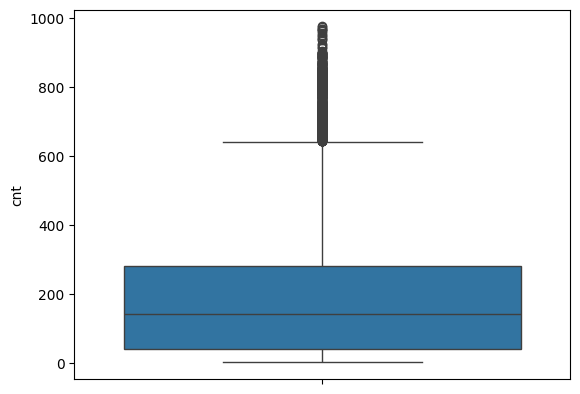

In [82]:
sns.boxplot(hour_df['cnt'])
plt.show()

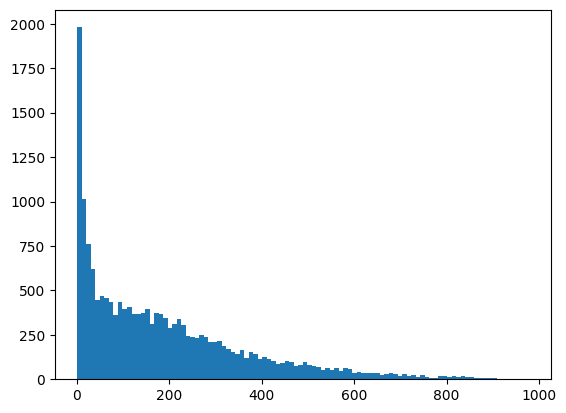

In [83]:
plt.hist(x=hour_df['cnt'], bins=100)
plt.show()

In [84]:
#deklarasi Q1, Q3, dan IQR
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

#mencari batas atas dan batas bawah
upper_bound = Q3 + 1.5 * IQR

#menampilkan semua data yang lebih dari batas atas
display(hour_df['cnt'][hour_df['cnt'] > upper_bound].value_counts().sort_index(ascending=False))
display(hour_df['cnt'][hour_df['cnt'] > upper_bound].value_counts().sort_values(ascending=False))

cnt
977    1
976    1
970    1
968    1
967    1
      ..
647    3
646    6
645    2
644    5
643    6
Name: count, Length: 229, dtype: int64

cnt
668    8
654    8
729    7
686    6
681    6
      ..
888    1
890    1
714    1
675    1
708    1
Name: count, Length: 229, dtype: int64

Dapat dilihat dari data diatas bahwa outlier pada cnt terdapat pada nilai 643 keatas.  
Data outlier tersebar di 229 value dengan jumlah maksimal 8.  
Data outlier casual terlihat valid dengan bentuk right skewed. 

Dalam kasus ini saya akan membiarkan value dari cnt dengan beberapa alasan :
- data outlier terdistribusi merata secara right skewed sehingga kemungkinan data adalah galat sangat kecil
- menghapus atau mengganti data berarti hasil proses tidak akan merepresentasikan data asli
- data cnt merupakan data yang dihasilkan dari penambahan casual dengan registered, jadi data cnt tidak bisa sembarangan disentuh

#### Export data menjadi CSV

Setelah semua data sudah di cek kondisinya, maka data akan dieksport menuju dashboard dengan nama file main_data.csv

In [85]:
hour_df.to_csv('dashboard/main_data.csv')

**Insight:**
- tipe data dteday diubah tipe datanya dari object menjadi datetime
- outlier pada holiday, weathersit, windspeed, casual, registered, dan cnt dibiarkan
- outlier pada hum diganti value nya menjadi median hum
- data yang sudah diproses akan diekspor ke dashboard dengan format main_data.csv

## Exploratory Data Analysis (EDA)

### Deskripsi dataframe

Hal yang pertama dilakukan dalam EDA pada kasus ini adalah untuk men discribe isi data sehingga kita tahu data aap saja yang akan kita proses

In [86]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.628026,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191633,0.122340,49.305030,151.357286,181.387599


### Distribusi Pemakaian sepeda

#### Berdasarkan jam

Data akan diproses untuk menghitung berapa banyak sepeda yang digunakan pada jam tertentu.  
Data dihitung dengan cara mencari rata-rata penggunaan sepeda dalam kurun waktu 1 jam.  
Data dibagi menjadi 3 kategori yaitu casual, registered, dan cnt

In [87]:
hour_df.groupby('hr').agg({"casual":"mean", "registered":"mean", "cnt":"mean"}).reset_index()

,hr,casual,registered,cnt
0,0,10.158402,43.739669,53.898072
1,1,6.504144,26.871547,33.375691
2,2,4.772028,18.097902,22.869930
3,3,2.715925,9.011478,11.727403
4,4,1.253945,5.098996,6.352941
5,5,1.411437,18.478382,19.889819
6,6,4.161379,71.882759,76.044138
7,7,11.055021,201.009629,212.064649
8,8,21.679505,337.331499,359.011004
9,9,30.891334,188.418157,219.309491


#### Berdasarkan hari

Data akan diproses untuk menghitung berapa banyak sepeda yang digunakan untuk tiap-tiap hari yang ada dalam 1 minggu.  
Data dihitung dengan cara mencari rata-rata penggunaan sepeda pada hari tertentu.  
Data dibagi menjadi 3 kategori yaitu casual, registered, dan cnt

In [88]:
hour_df.groupby('weekday').agg({"casual":"mean", "registered":"mean", "cnt":"mean"}).reset_index()

,weekday,casual,registered,cnt
0,0,56.163469,121.305356,177.468825
1,1,28.553449,155.191206,183.744655
2,2,23.580514,167.658377,191.238891
3,3,23.159192,167.971313,191.130505
4,4,24.872521,171.564144,196.436665
5,5,31.458786,164.677121,196.135907
6,6,61.246815,128.962978,190.209793


#### Berdasarkan bulan

Data akan diproses untuk menghitung berapa banyak sepeda yang digunakan untuk tiap-tiap bulan.  
Data dihitung dengan cara mencari rata-rata penggunaan sepeda pada 1 bulan.  
Data dibagi menjadi 3 kategori yaitu casual, registered, dan cnt

In [89]:
hour_df.groupby('mnth').agg({"casual":"mean", "registered":"mean", "cnt":"mean"}).reset_index()

,mnth,casual,registered,cnt
0,1,8.426872,85.997901,94.424773
1,2,11.158091,101.706935,112.865026
2,3,30.172437,125.238289,155.410726
3,4,42.311761,144.949200,187.260960
4,5,50.594758,172.312500,222.907258
5,6,51.323611,189.191667,240.515278
6,7,52.524866,179.295027,231.819892
7,8,48.840000,189.257627,238.097627
8,9,48.937370,191.835769,240.773138
9,10,41.185389,180.973122,222.158511


### Pemakaian seperda berdasarkan musim

Data akan diproses untuk menghitung berapa banyak sepeda yang digunakan untuk tiap-tiap musim.  
Data dihitung dengan cara mencari rata-rata penggunaan sepeda pada 1 musim.  
Data dibagi menjadi 3 kategori yaitu casual, registered, dan cnt

In [90]:
hour_df.groupby('season').agg({"casual":"mean", "registered":"mean", "cnt":"mean"}).reset_index()

,season,casual,registered,cnt
0,1,14.290901,96.823668,111.114569
1,2,46.160581,162.183488,208.344069
2,3,50.287144,185.729093,236.016237
3,4,30.666824,168.202032,198.868856


Dapat dilihat bahwa urutan menyewa sepeda dari yang terbanyak yaitu dari 3 (musim gugur), 2 (musim panas), 4 (musim dingin), dan terakhir di 1 (musim semi)

**Insight:**
- jam paling aktif untuk orang memakai sepeda adalah jam 17
- hari paling aktif untuk orang memakai sepeda adalah hari kamis (5)
- bulan paling aktif untuk orang memakai sepeda adalah bulan agustus (8)
- musim paling sering orang bersepeda adalah musim gugur, disusul musim panas, musim dingin, dan musim semi

## Visualization & Explanatory Analysis

### Pertanyaan 1:

**Pada kurun waktu kapan sepeda dipakai paling banyak**

Hal ini dapat dijawab dengan melihat jam berapa rata-rata sepeda digunakan paling banyak.  
Data tersebut dibantu visualisasinya menggunakan line chart.

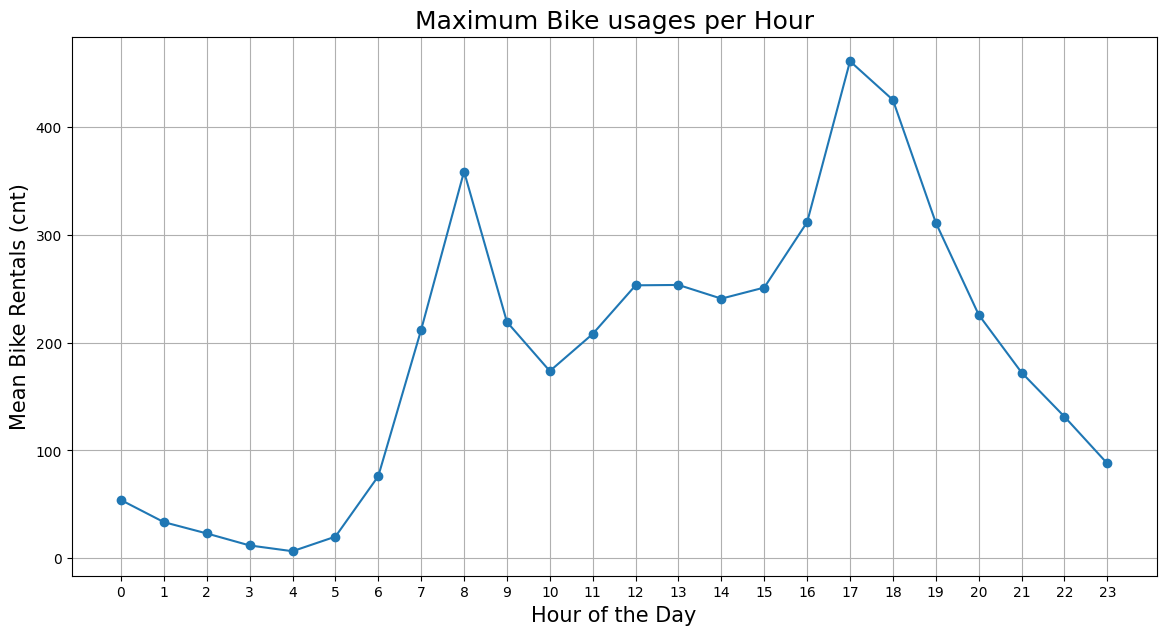

In [102]:
#mengambil nilai rata-rata untuk setiap jam
mean_cnt = hour_df.groupby('hr')['cnt'].mean().reset_index()

#plotting
plt.figure(figsize=(14, 7))
plt.plot(mean_cnt['hr'], mean_cnt['cnt'], marker='o')
plt.xlabel('Hour of the Day', size=15) 
plt.xticks(ticks=range(0, 24), labels=range(0, 24))
plt.ylabel('Mean Bike Rentals (cnt)', size=15)
plt.title('Maximum Bike usages per Hour', size=18)
plt.grid(True)
plt.show()

Selain hanya menampilkan data total penggunaan sepeda, kita juga bisa memodifikasi grafik tersebut untuk menampilkan grafik pengguna teregistrasi dan pengguna sementara

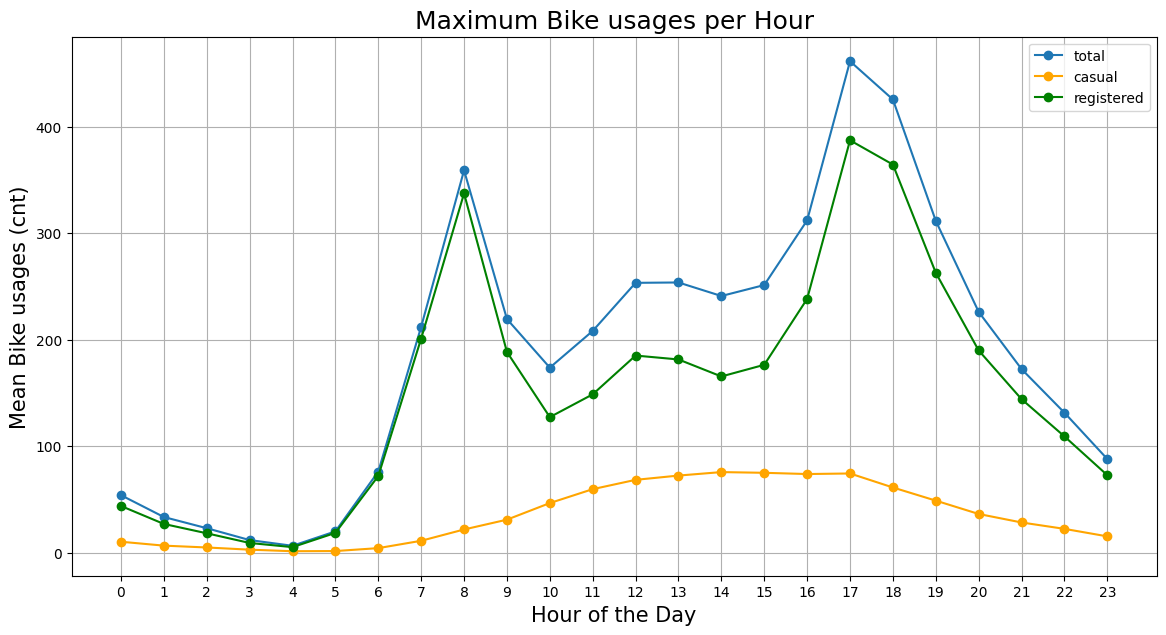

In [99]:
#mengambil nilai rata-rata untuk setiap jam
mean = hour_df.groupby('hr').agg({"casual":"mean", "registered":"mean", "cnt":"mean"}).reset_index()

#plotting
plt.figure(figsize=(14, 7))
plt.plot(mean['hr'], mean['cnt'], label='total', marker='o')
plt.plot(mean['hr'], mean['casual'], label='casual', marker='o', color='orange')
plt.plot(mean['hr'], mean['registered'], label='registered', marker='o', color='green')
plt.xlabel('Hour of the Day', size=15) 
plt.xticks(ticks=range(0, 24), labels=range(0, 24))
plt.ylabel('Mean Bike usages (cnt)', size=15)
plt.title('Maximum Bike usages per Hour', size=18)
plt.legend()
plt.grid(True)
plt.show()

Dapat dilihat, untuk total penggunaan sepeda dan penggunaan sepeda oleh pengguna teregristasi memiliki puncak tertinggi pada pukul 17.00.  
Penggunaan sepeda oleh pengguna sementara mulai terjadi pada pagi menuju siang hari dan menurun pada sore menuju malam hari.

### Pertanyaan 2:

**bagaimana pengaruh musim terhadap pemakaian sepeda**

Hal ini dapat dijawab dengan melihat banyaknya data yang ada pada setiap musim.  
Data tersebut dibantu visualisasinya menggunakan scatter plot.

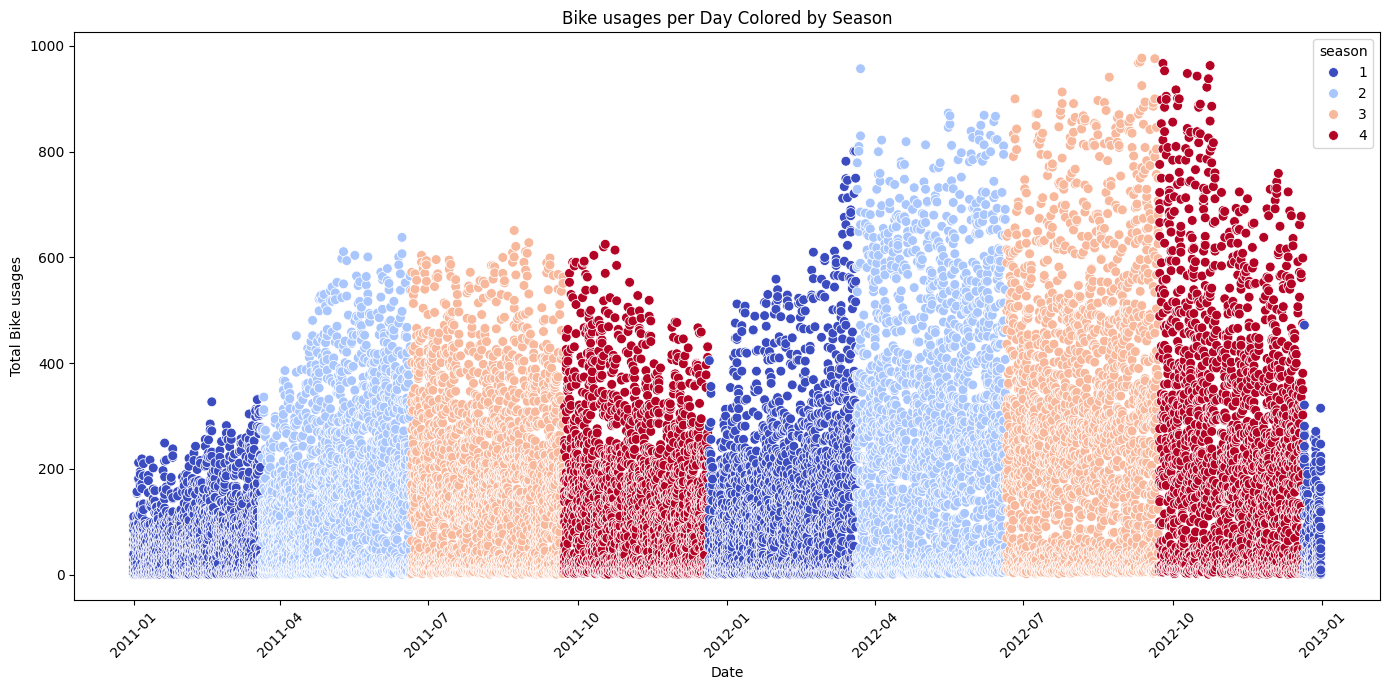

In [94]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=hour_df, x="dteday", y="cnt", hue="season", palette="coolwarm", s=50)
plt.xticks(rotation=45)
plt.title('Bike usages per Day Colored by Season')
plt.xlabel('Date')
plt.ylabel('Total Bike usages')
plt.tight_layout()
plt.show()

Dapat dilihat pada gambar tersebut bahwa musim memiliki pengaruh terhadap penggunaan sepeda.  
Hal ini dibuktikan dengan adanya tren yang mengikuti pergantian musin dalam setiap tahunnya.  
Pada musim semi (1) penggunaan sepeda cenderung rendah.  
Pada musim panas (2) penggunaan sepeda cenderung naik dari penggunaan pada musim semi.  
Pada musim gugur (3) penggunaan sepeda cenderung naik sedikit demi sedikit dan mencapai puncak saat sudah dekat dengan musim dingin.  
Pada musim dingin (4) penggunaan sepeda cenderung menurun.

**Insight:**
- Penggunaan sepeda selama sehari memiliki 2 puncak yaitu pada pagi hari dan pada sore hari. Pada pagi hari sekitar pukul 8, penggunaan sepeda oleh pengguna yang teregristrasi akan meningkat secara pesat dan cenderung menurun ketika menuju siang hari. Paga sore hari penggunaan sepeda teregristrasi naik dan mencapai puncaknya pada pukul 17. Sementara penggunaan sepeda sementara mulai terjadi pada pagi menuju siang hari dan menurun pada sore menuju malam hari.
- Penggunaan sepeda pada musim semi atau awal tahun cenderung rendah dan terus meningkat sampai mencapai musim semi. Akhir musim semi sampai awal musim panas cenderung naik secara perlahan-lahan dan mencapai puncak saat akhir musim semi dan awal musim dingin. Saat mulai masuk musim dingin, penggunaan sepeda terus menurun sampai mencapai musim semi

## Conclusion

- Penggunaan sepeda oleh pengguna teregristrasi akan memuncak saat pagi hari dan sore hari, ini menandakan bahwa sepeda digunakan untuk bepergian seharian misal seperti bekerja atau sekolah. Sementara penggunaan sepeda oleh pengguna sementara terjadi di pagi sampai sore hari menandakan bahwa sepeda digunakan untuk aktivitas sesaat pada siang hari.
- musim sangat berpengaruh pada penggunaan sepeda. Pengunaan sepeda akan cenderung sedikit pada musim semi dan naik seiring datangnya musim panas. saat musim panas sampai musim gugur penggunaan sepeda cenderung naik dan mencapai puncaknya di akhir musim gugur. saat memasuki musim dingin, penggunaan sepeda akan menurun sampai musim semi.